# Compression

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

## Introduction

Do you know how bytes are needed to code one second of Full HD video?
Let me recall that this standard is characterized by images of size 1920 × 1080, each of the three channels (RGB) is coded with 1 byte, and there are 50 frames per second.

```{toggle}
One second contains 1920 × 1080 × 3 × 50 = 311 040 000 bytes, or around 311 Mb.
Thus, a DVD (4,7 Gb) can store only 15 s of a movie...
```

This example shows the need for image compression!
The goal of image compression is to hold the _information_ contained in the image with fewer bytes than the original image.
OK, but how to quantify information?
In 1948, [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) proposed to consider that an image or a message is very informative if it is unlikely.
This definition is currently still used and needs to model the problem by using probabilities (but this is out of the scope of this course).

We distinguish two kinds of compression:

* With **lossless compression**, no information is lost during compression
  (_i.e._ the original image and the compressed image are perfectly identical.
  It is possible to reach a compression ratio up to 1/10
  (the size in bytes of the compressed image is 1/10 times the original one).
  
* In **lossy compression**, we accept to lose information during compression
  (while ensuring that the original image remains close to the original one).
  The compression ratio can reach 1/100!

## Lossless compression

Here are two examples of lossless image compression.

### Run-length encoding

RLE (run-length encoding) replaces a sequence of pixels of the same color with the number of pixels in that sequence.
Therefore, the image {numref}`F:compression:rle` needs 9 bytes to be stored without any compression.
The bytes are:

$$
  \begin{pmatrix} 0 & 0 & 0 & 255 & 255 & 255 & 255 & 128 & 128 \end{pmatrix}.
$$


```{glue:figure} G:compression:rle
:name: "F:compression:rle"

A 3 × 3 image.
```

By reading the image column after column, we see 3 pixels with intensity 0, 4 pixels with intensity 255, and 2 pixels with intensity 128.
Thus the image is encoded in RLE with only 6 bytes:

$$
  \begin{pmatrix} 3 & 0 & 4 & 255 & 2 & 128 \end{pmatrix}.
$$

In this example, the compression rate is 6/9 = 2/3.

In computers, the BMP format is based on RLE compression.

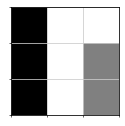

In [2]:
fig = plt.figure(figsize=(2,2))
img = np.array([[0, 255, 255], [0, 255, 128], [0, 255, 128]])
plt.imshow(img, cmap="gray")
ax = plt.gca()
plt.xticks([])
plt.yticks([])
ax.set_xticks(np.arange(-.5,3), minor=True)
ax.set_yticks(np.arange(-.52,3), minor=True)
ax.grid(which='minor', color='#cccccc')
# tick_params(axis='both', labelsize=0, length=0)
plt.grid()
glue("G:compression:rle", fig, display=False)

### Lempel-Ziv-Welch Algorithm

The LZW algorithm (Lempel-Ziv-Welch, 1984) is an improvement of the LZ78 algorithm (1978).
It is used in format like GIF or TIFF.

%The principle is to build a dictionary of existing groups of pixels and to assign a code to each group.

%The algorithm is the following one:

%Initialize the dictionary with all the possible intensities
%For each pixel:
%  Look to the longest sequence in the dictionary that starts at this pixel
%  Replace this sequence with the corresponding code
%  Add to the dictionary the sequence followed by the next pixel

## Lossy compression

### Principle

The most famous compression format for images is JPEG,
created in 1992 by the Joint Photographic Experts Group.
The idea of JPEG compression is to apply a specific transform on the image,
such that most coefficients of the transformed image are very small and can be cancelled,
thus gaining storage at the price of a very little visual degradation.
This principle is also used in lossy compression of audio (MP3) and video (MPEG).

Most of the energy of usual pictures are concentrated in low frequencies,
so the {ref}`discrete Fourier transform <C:fourier>` (DFT) could be a good idea to perform lossy compression.
It appears though that the so-called _discrete cosine transform_ (DCT) is a better choice for computational reasons.
Note that JPEG2000 (which is a newer but rarely used version of JPEG) used a wavelet transform.

### The discrete cosine transform

The DCT of an image $f$ of size $N \times N$ is an image $F$ of same size defined as:

$$
  F(u,v) = \frac{2}{N} C(u) C(v) \sum_{m=0}^{N-1} \sum_{n=0}^{N-1}
  f(m, n) \cos\left[\frac{(2m+1)u\pi}{2N} \right] \cos\left[\frac{(2n+1)v\pi}{2N} \right]
$$

where

$$
  C(u) =
  \begin{cases}
    \frac{1}{\sqrt{2}}  &\text{if}\; u = 0, \\
    1                   &\text{if}\; u > 0.
  \end{cases}
$$

The DCT is similar to {ref}`DFT <C:fourier:definition>` except that the complex exponentials are replaced by cosine.

The DCT decomposes an image into 2D cosines of different frequencies.
Considering an image of size 8 × 8, the 64 possible cosines of the DCT are represented {numref}`F:compression:dct-coefficients`.

```{glue:figure} G:compression:dct-coefficients
:name: "F:compression:dct-coefficients"

The 64 coefficients of a DCT of size 8 × 8.
```

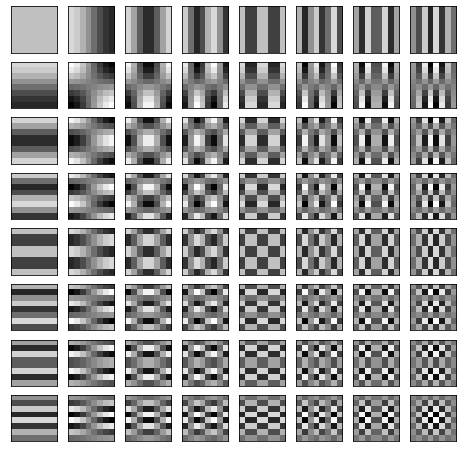

In [3]:
fig = plt.figure(figsize=(8,8))
for x in range(8):
    for y in range(8):
    
        # DCT (nulle partout sauf au pixel p)
        F = np.zeros((8,8))
        F[y,x] = 1

        # DCT inverse (ne pas oublier l'option norm='ortho' !)
        f = fft.idctn(F, norm='ortho')
        
        # Affichage de l'image de la base
        plt.subplot(8, 8, 8*y+x+1)
        plt.imshow(f, "gray", vmin=-.25, vmax=.25)
        plt.xticks([])
        plt.yticks([])
        
glue("G:compression:dct-coefficients", fig, display=False)

### Example of the DCT of an image

To illustrate the DCT applied to an image, consider the image given in {numref}`F:compression:squirrel-crop`,
which is a crop of size 8 × 8 centered on the squirrel snout.

```{glue:figure} G:compression:squirrel-crop
:name: "F:compression:squirrel-crop"

The 8 × 8 image to be transformed with DCT (right).
```

The 64 coefficients of the DCT of the crop are shown in {numref}`F:compression:squirrel-coefficients`.
As you can see, the coefficient at the top left, which correspond at the lower frequencies
(see {numref}`F:compression:dct-coefficients`) are the largest.

```{glue:figure} G:compression:squirrel-coefficients
:name: "F:compression:squirrel-coefficients"

The 64 coefficients of the DCT applied to {numref}`F:compression:squirrel-crop`.
Those which are cancelled are stroked out with a red cross.
```

Because the human eye is less sensitive to high frequencies than low frequencies,
the idea of JPEG compression is to cancel the coefficients at the bottom right in {numref}`F:compression:squirrel-coefficients`.

So, we cancel the coefficients stroked with a red cross, and reconstruct the image by using the inverse DCT
(the expression of the inverse DCT is not given here but is similar to what the inverse Fourier transform is for the Fourier transform).
The reconstructed image with only 28 coefficients (over 64) is shown in {numref}`F:compression:squirrel-comparison` (right).
As you can see, the result is very similar to the original image, while less than 50 % coefficients are conserved!
This small example shows the interest of going into the domain of a transformation and cancelling certain coefficients

```{glue:figure} G:compression:squirrel-comparison
:name: "F:compression:squirrel-comparison"

The original image (left) and the compressed one (right).
```

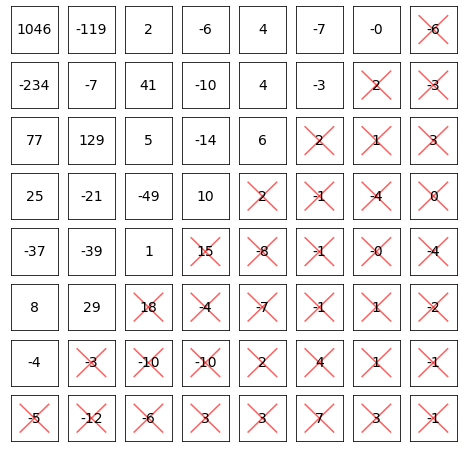

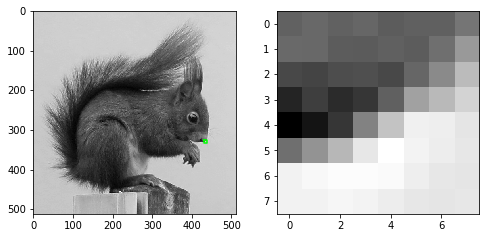

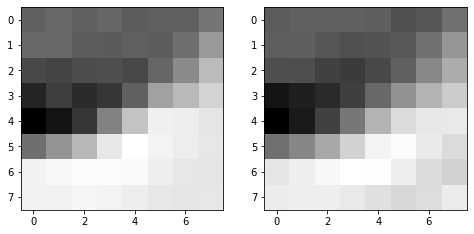

In [4]:
import skimage.io as io
img = io.imread("figs/squirrel.png")

x1, y1 = 430, 325
x2, y2 = x1+8, y1+8
crop = img[y1:y2, x1:x2]

F = fft.dctn(crop, norm='ortho')

# Affichage
fig = plt.figure(figsize=(8,8))
for x in range(8):
    for y in range(8):
        
        plt.subplot(8, 8, 8*y+x+1)
        plt.text(.5, .5, f"{F[y,x]:.0f}", horizontalalignment='center', verticalalignment='center', size=14)
        plt.xticks([])
        plt.yticks([])
        
        if x+y>=7:
            F[y,x]=0
            plt.plot([.2, .8], [.2, .8], color="#ff0000A0")
            plt.plot([.2, .8], [.8, .2], color="#ff0000A0")
            
        plt.xlim([0, 1])
        plt.ylim([0, 1])

glue("G:compression:squirrel-coefficients", fig, display=False)

rec = fft.idctn(F, norm='ortho')

# Entire image & crop
fig = plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(img, "gray")
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], color="#00ff00")
crop = img[y1:y2, x1:x2]
plt.subplot(1,2,2)
plt.imshow(crop, "gray")
glue("G:compression:squirrel-crop", fig, display=False)

# Comparison (before and after compression)
fig = plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(crop, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(rec, cmap="gray")
glue("G:compression:squirrel-comparison", fig, display=False)

### Other steps in JPEG compression

Computing the DCT of the image and using only the low-frequency coefficients for the reconstruction
is at the heart of the JPEG compression.
To gain even more in terms of compression, other steps are added in the real JPEG compression.
Here are some of them.

* Color images are coded with three channels, the well-known red-green-blue color space.
  [Numerous color spaces](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses) exist aside from the usual RGB one.
  Especially, the YCbCr is the one used in JPEG compression
  because the Y channel codes the brightness of the image and contains important information for the human eye.
  In consequence, the two other channels (Cb and Cr) are sub-sampled to have less pixel to store.
  
* The image is split in sub-images of size 8 × 8, and one DCT is computed on each of the sub-images.

* In the previous section, the high-frequency coefficients are cancelled.
  In reality, a quantification is made on every coefficient of each DCT,
  but the quantification is fine for low-frequency coefficients and rough for high-frequency ones.

* The array composed of the 64 coefficients of each sub-image is compressed with a lossless compression method
  (namely, [Huffman coding](https://en.wikipedia.org/wiki/Huffman_coding))